In [1]:
#from utility_bfvariater import *
from utility_bfcombiner import *
from utility_common import *
from utility_commonPlot import *
%matplotlib inline

In [2]:
beta0 = np.load('../data/combine/contralValue.npy')
stat_covar = np.load('../data/combine/stat_covar.npy')
syst_covar = np.load('../data/combine/syst_covar.npy')

covarTotal = np.sum(stat_covar,axis=0) + np.sum(syst_covar,axis=0)
#covarTotal = stat_covar[0]

# 1. Numerical Combine

11.0292 +/- 0.2575, rel error 2.3842
11.0157 +/- 0.1975, rel error 1.8287
10.3120 +/- 0.6755, rel error 6.2544


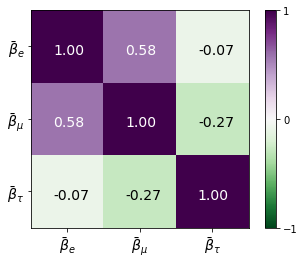

In [6]:
# numerical Combiner
combiner = BFCombiner(covarTotal, beta0)
sigma, corr = combiner.paramSigma()

# print result
for i in range(3):
    c, s = combiner.paramLS[i], sigma[i]
    print('{:6.4f} +/- {:6.4f}, rel error {:6.4f}'.format(c*100,s*100, 100*s/0.108))
    
showParameterCov(corr)
plt.savefig('../plots/combine/covarMatrix_beta.png',dpi=300)

In [4]:
print( (2.3997**2-0.37**2)**0.5 )
print( (1.8425**2-0.33**2)**0.5 )
print( (6.3717**2-0.81**2)**0.5 )

2.371004025724124
1.8127068847444696
6.320004817244999


# 2. Analytical Combine

11.0292 +/- 0.2575
11.0157 +/- 0.1975
10.3120 +/- 0.6755


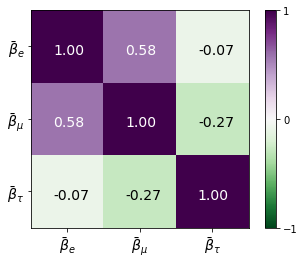

In [5]:
# Analytical Combiner
invCovarTotal = np.linalg.pinv( covarTotal )
i3 = np.identity(3)
Amatrix = np.r_[i3,i3,i3,i3]
hess = np.matmul(Amatrix.T, np.matmul(invCovarTotal,Amatrix))
hessinv = np.linalg.pinv( hess )
factor2 = np.matmul(Amatrix.T, invCovarTotal)
Bmatrix = np.matmul(hessinv,factor2)
mean  = np.matmul(Bmatrix,beta0)
sigma = hessinv.diagonal()**0.5
corr  = hessinv/np.outer(sigma, sigma)
# print result
for i in range(3):
    print('{:6.4f} +/- {:6.4f}'.format(mean[i]*100,sigma[i]*100) )
showParameterCov(corr)

# [BACKUP] Parametrize By r

In [5]:
combiner = BFCombiner(covarTotal, beta0, paramTypy='r')
sigma, corr = combiner.paramSigma()
rVar = np.outer(sigma,sigma)*corr
rVar = rVar[0:2,0:2]
invVar = np.linalg.pinv(rVar)

r1_mean, r2_mean = 1,1 # combiner.paramLS[0], combiner.paramLS[1]

In [6]:
x = np.linspace(0.9, 1.1, 100)
y = np.linspace(0.9, 1.1, 100)
X, Y = np.meshgrid(x, y)


nll  = invVar[0,0]*(X-r1_mean)**2 
nll += invVar[1,1]*(Y-r2_mean)**2
nll += invVar[0,1]*(Y-r2_mean)*(X-r1_mean)*2
nll *= 2


plt.figure(figsize=(5,5),facecolor='w')


plt.contourf(X, Y, nll, levels=[0,1,2,3],vmax=3,vmin=-1)
plt.scatter(r1_mean, r2_mean, c='w')
plt.xticks([0.95,1,1.05])
plt.yticks([0.95,1,1.05])


plt.scatter(1, 1, c='k',marker='s',s=100)
plt.grid(True,alpha=0.5,linestyle='--')

plt.xlabel(r'$\beta_\tau / \beta_e$',fontsize=14,position=(1,1),labelpad=-10)
plt.ylabel(r'$\beta_\tau / \beta_\mu$',fontsize=14,position=(1,1),labelpad=-10)

plt.savefig('../plots/combine/sigma.png',dpi=300)

# [BACKUP]  Visualize Var Matrix

In [7]:
plt.figure(figsize=(14,10),facecolor='w')
showCovar(covar,sameCNorm=False)
plt.savefig('../plots/combine/covarMatrix.png',dpi=300)

NameError: name 'covar' is not defined

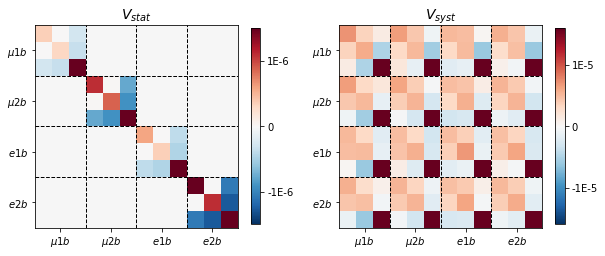

In [12]:
plt.figure(figsize=(10,4),facecolor='w')

plt.subplot(1,2,1)
mtx = covar[0] #* 10000
showSingleCovar(mtx, norm= 1.5e-6, titleName=r'$V_{stat}$')
cbar = plt.colorbar( ticks=[-1e-6, 0, 1e-6],shrink=0.9)
#cbar.ax.set_title(r'$V_{\beta_i\beta_j}$')
cbar.ax.set_yticklabels(['-1E-6', '0', '1E-6'])

plt.subplot(1,2,2)

mtx = np.sum(covar[1:],axis=0) #* 10000
showSingleCovar(mtx, norm= 16e-6, titleName=r'$V_{syst}$')
cbar = plt.colorbar( ticks=[-10e-6, 0, 10e-6],shrink=0.9)
#cbar.ax.set_title(r'$V_{\beta_i\beta_j}$')
cbar.ax.set_yticklabels(['-1E-5', '0', '1E-5'])


plt.savefig('../plots/combine/covarMatrix_total.png',dpi=300)

In [ ]:
0.281,0.389,1.438, 0.430,0.184,0.976, 0.155,0.058,1.114, 0.451,0.130,1.106